In [57]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

%matplotlib inline

In [7]:
ds = pd.read_csv('./mushrooms.csv')
ds.head(n=10)

#data = 8124 rows x 23 columns

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [13]:
ds.columns

Index([u'class', u'cap-shape', u'cap-surface', u'cap-color', u'bruises',
       u'odor', u'gill-attachment', u'gill-spacing', u'gill-size',
       u'gill-color', u'stalk-shape', u'stalk-root',
       u'stalk-surface-above-ring', u'stalk-surface-below-ring',
       u'stalk-color-above-ring', u'stalk-color-below-ring', u'veil-type',
       u'veil-color', u'ring-number', u'ring-type', u'spore-print-color',
       u'population', u'habitat'],
      dtype='object')

In [17]:
ds.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [21]:
labels = {}
for col in ds.columns:
    temp = np.asarray([ds[col]])
    temp = np.unique(temp)
    labels[col] = {}
    lab = 0
    for char in temp:
        labels[col][char] = lab
        lab += 1
        ds[col] = ds[col].replace(char, lab)
print labels

{'habitat': {'d': 0, 'g': 1, 'm': 3, 'l': 2, 'p': 4, 'u': 5, 'w': 6}, 'cap-shape': {'c': 1, 'b': 0, 'f': 2, 'k': 3, 's': 4, 'x': 5}, 'cap-color': {'c': 1, 'b': 0, 'e': 2, 'g': 3, 'n': 4, 'p': 5, 'r': 6, 'u': 7, 'w': 8, 'y': 9}, 'stalk-color-above-ring': {'c': 1, 'b': 0, 'e': 2, 'g': 3, 'o': 5, 'n': 4, 'p': 6, 'w': 7, 'y': 8}, 'stalk-shape': {'e': 0, 't': 1}, 'gill-attachment': {'a': 0, 'f': 1}, 'ring-number': {'t': 2, 'o': 1, 'n': 0}, 'odor': {'a': 0, 'c': 1, 'f': 2, 'm': 4, 'l': 3, 'n': 5, 'p': 6, 's': 7, 'y': 8}, 'gill-size': {'b': 0, 'n': 1}, 'stalk-color-below-ring': {'c': 1, 'b': 0, 'e': 2, 'g': 3, 'o': 5, 'n': 4, 'p': 6, 'w': 7, 'y': 8}, 'veil-color': {'y': 3, 'w': 2, 'o': 1, 'n': 0}, 'stalk-surface-below-ring': {'y': 3, 'k': 1, 's': 2, 'f': 0}, 'gill-spacing': {'c': 0, 'w': 1}, 'spore-print-color': {'b': 0, 'h': 1, 'k': 2, 'o': 4, 'n': 3, 'r': 5, 'u': 6, 'w': 7, 'y': 8}, 'gill-color': {'b': 0, 'e': 1, 'g': 2, 'h': 3, 'k': 4, 'o': 6, 'n': 5, 'p': 7, 'r': 8, 'u': 9, 'w': 10, 'y': 

In [22]:
ds.head(n=10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,6,3,5,2,7,2,1,2,5,...,3,8,8,1,3,2,5,3,4,6
1,1,6,3,10,2,1,2,1,1,5,...,3,8,8,1,3,2,5,4,3,2
2,1,1,3,9,2,4,2,1,1,6,...,3,8,8,1,3,2,5,4,3,4
3,2,6,4,9,2,7,2,1,2,6,...,3,8,8,1,3,2,5,3,4,6
4,1,6,3,4,1,6,2,2,1,5,...,3,8,8,1,3,2,1,4,1,2
5,1,6,4,10,2,1,2,1,1,6,...,3,8,8,1,3,2,5,3,3,2
6,1,1,3,9,2,1,2,1,1,3,...,3,8,8,1,3,2,5,3,3,4
7,1,1,4,9,2,4,2,1,1,6,...,3,8,8,1,3,2,5,4,4,4
8,2,6,4,9,2,7,2,1,2,8,...,3,8,8,1,3,2,5,3,5,2
9,1,1,3,10,2,1,2,1,1,3,...,3,8,8,1,3,2,5,3,4,4


In [24]:
data = []
for col in ds.columns:
    if col=='class':
        continue
    data.append(ds[col])
data = np.asarray(data).T
print data.shape
ans = ds['class']

(8124, 22)


In [61]:
X_train = data[:6500, :]
y_train = ans[:6500]
X_test = data[6500:, :]
y_test = ans[6500:]

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(6500, 22) (6500,)
(1624, 22) (1624,)


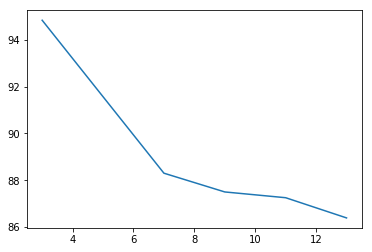

Max Accuracy:  94.8275862069  for  3  nearest neighbours


In [88]:
#KNN - http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
accuracy_plot = []
for ix in range(3,15,2):
    knn = KNeighborsClassifier(n_neighbors=ix, weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_plot.append(accuracy_score(y_test, y_pred)*100)

plt.plot(range(3,15,2), accuracy_plot)
plt.show()

accuracy_plot = np.asarray(accuracy_plot)
print 'Max Accuracy: ', accuracy_plot.max(), ' for ', 3+(2*accuracy_plot.argmax()), ' nearest neighbours'

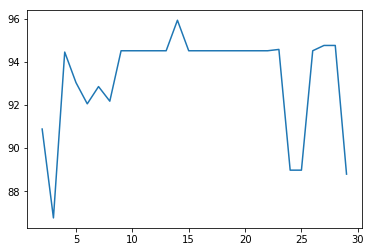

Max Accuracy:  95.9359605911  for  14  clusters


In [89]:
#KMeans
accuracy_plot = []
for ix in range(2,30):
    NC = ix
    km = KMeans(n_clusters = NC)
    KClusters = km.fit(X_train)

    clusters = {}
    for ix in range(y_train.shape[0]):
        if KClusters.labels_[ix] in clusters.keys():
            clusters[KClusters.labels_[ix]].append(y_train[ix])
        else:
            clusters[KClusters.labels_[ix]] = [y_train[ix]]

    cluster_correct_labels = {}
    for k in clusters.keys():
        pred_arr = np.asarray(clusters[k])
        pred_arr = np.unique(pred_arr, return_counts=True)
        pred = pred_arr[1].argmax()
        cluster_correct_labels[k] = pred_arr[0][pred]

    y_pred = KClusters.predict(X_test)
    for ix in range(len(y_pred)):
        y_pred[ix] = cluster_correct_labels[y_pred[ix]]

    accuracy_plot.append(accuracy_score(y_test, y_pred)*100)

plt.plot(range(2,30), accuracy_plot)
plt.show()

accuracy_plot = np.asarray(accuracy_plot)
print 'Max Accuracy: ', accuracy_plot.max(), ' for ', accuracy_plot.argmax()+2, ' clusters'

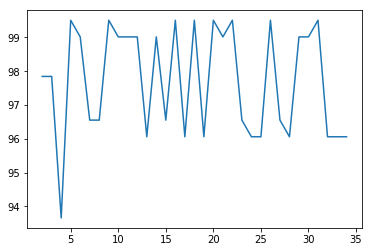

Max Accuracy:  99.5073891626  for  5  depth


In [90]:
#Decision-Tree
accuracy_plot = []
for ix in range(2, 35):
    dt = tree.DecisionTreeClassifier(max_depth = ix)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy_plot.append(accuracy_score(y_test, y_pred)*100)

plt.plot(range(2,35), accuracy_plot)
plt.show()

accuracy_plot = np.asarray(accuracy_plot)
print 'Max Accuracy: ', accuracy_plot.max(), ' for ', accuracy_plot.argmax()+2, ' depth'

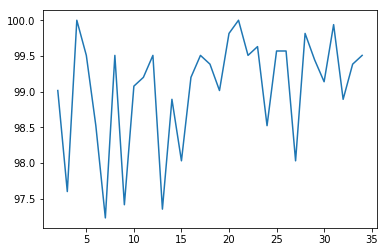

Max Accuracy:  100.0  for  4  estimators


In [91]:
#Random-Forest
accuracy_plot = []
for ix in range(2, 35):
    rf = RandomForestClassifier(n_estimators=ix)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy_plot.append(accuracy_score(y_test, y_pred)*100)

plt.plot(range(2,35), accuracy_plot)
plt.show()

accuracy_plot = np.asarray(accuracy_plot)
print 'Max Accuracy: ', accuracy_plot.max(), ' for ', accuracy_plot.argmax()+2, ' estimators'